In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify
import json

In [2]:
debt_data = pd.read_csv("statewise_all_assets_rep.csv", index_col = 0)

In [3]:
with open('state_abbrev.json') as json_file:
    us_state_to_abbrev = json.load(json_file)
US_map = gpd.read_file("gz_2010_us_040_00_500k.json")
US_map.replace({"NAME": us_state_to_abbrev}, inplace=True)
df_merged = US_map.merge(debt_data, left_on="NAME", right_on="state")
df_merged = df_merged[df_merged['NAME'].apply(lambda x: x not in ['KY', 'ME', 'TN'])]

In [4]:
#replacing 0 with nan
df_merged.replace(0, np.nan, inplace = True)

In [5]:
def set_cbar_labels(axis, labels):
    fig = axis.figure
    cb_ax = fig.axes[1]
    cb_ax.set_xticklabels(labels)
    return None

In [6]:
def makeGraph(colname, title, legendtitle):
    fig1,ax1 = plt.subplots(1,figsize=(10,15))
    plt.title(title)
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("bottom", size="5%", pad=0.1)
    fig1 = df_merged.plot(column = colname, ax = ax1, legend = True, cax=cax1, edgecolor='white',
                          cmap="Oranges", legend_kwds = {'label': legendtitle, 'orientation': 'horizontal'},
                         missing_kwds = {'color': 'lightgrey'})
    df_merged.apply(lambda x: ax1.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], 
                                           ha='center', fontsize=7, color='black'), axis=1);
    ax1.set_axis_off()
    #set_cbar_labels(ax1)
    plt.savefig('../Producables/Maps/' + title + '.png')
    plt.show()

## Total Debt Breakdown

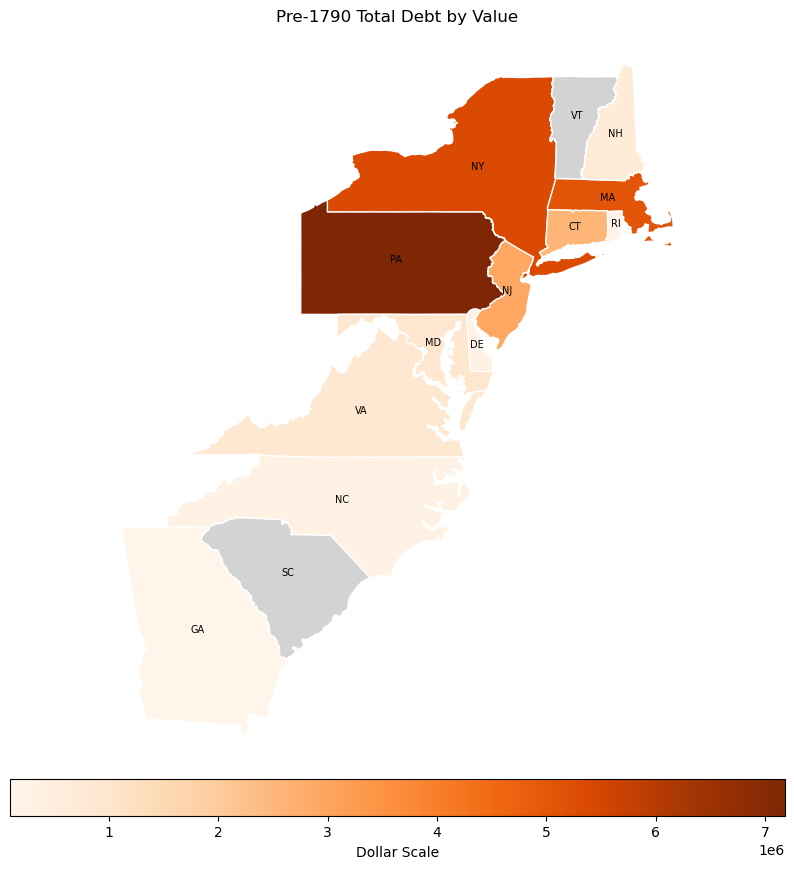

In [7]:
makeGraph('pre1790 total', "Pre-1790 Total Debt by Value", "Dollar Scale")

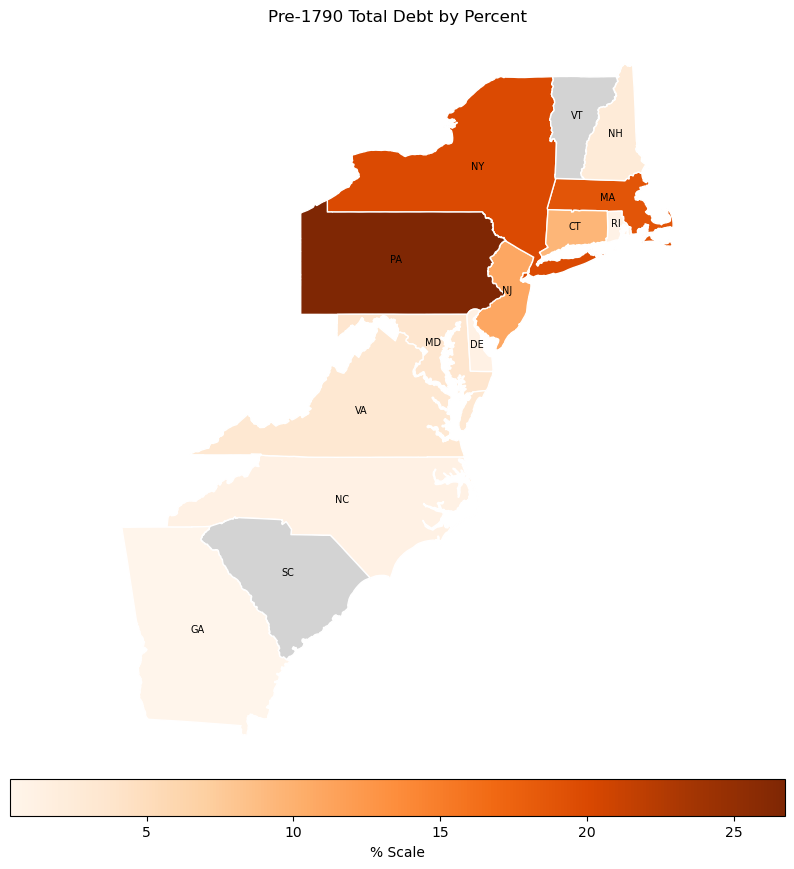

In [8]:
makeGraph('pre1790 pct', "Pre-1790 Total Debt by Percent", "% Scale")

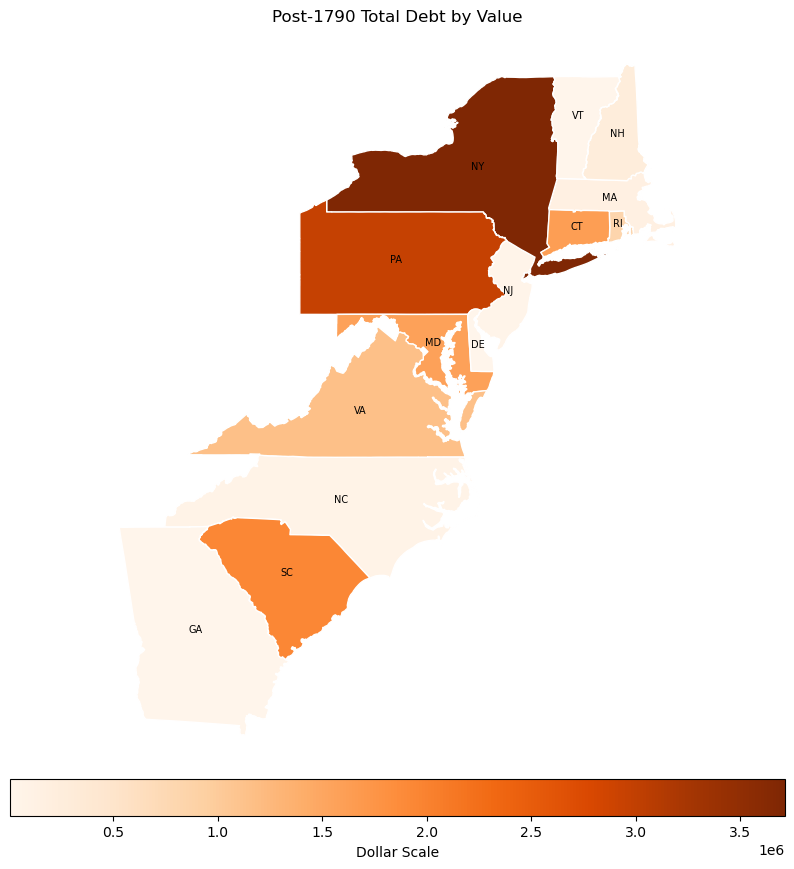

In [9]:
makeGraph('post1790 total', "Post-1790 Total Debt by Value", "Dollar Scale")

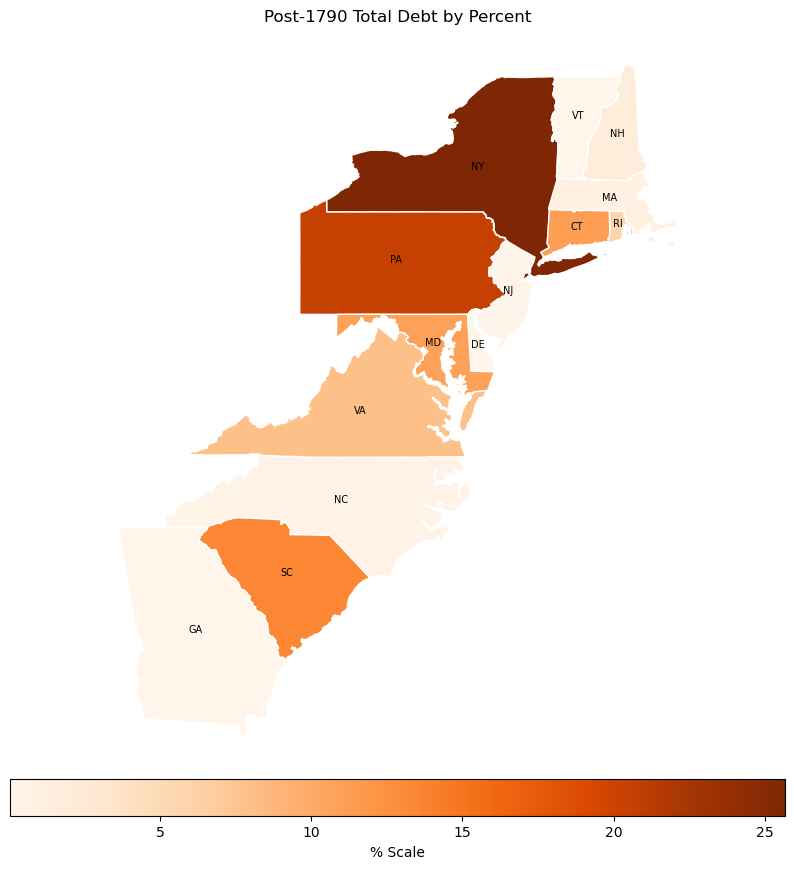

In [10]:
makeGraph('post1790 pct', "Post-1790 Total Debt by Percent", "% Scale")

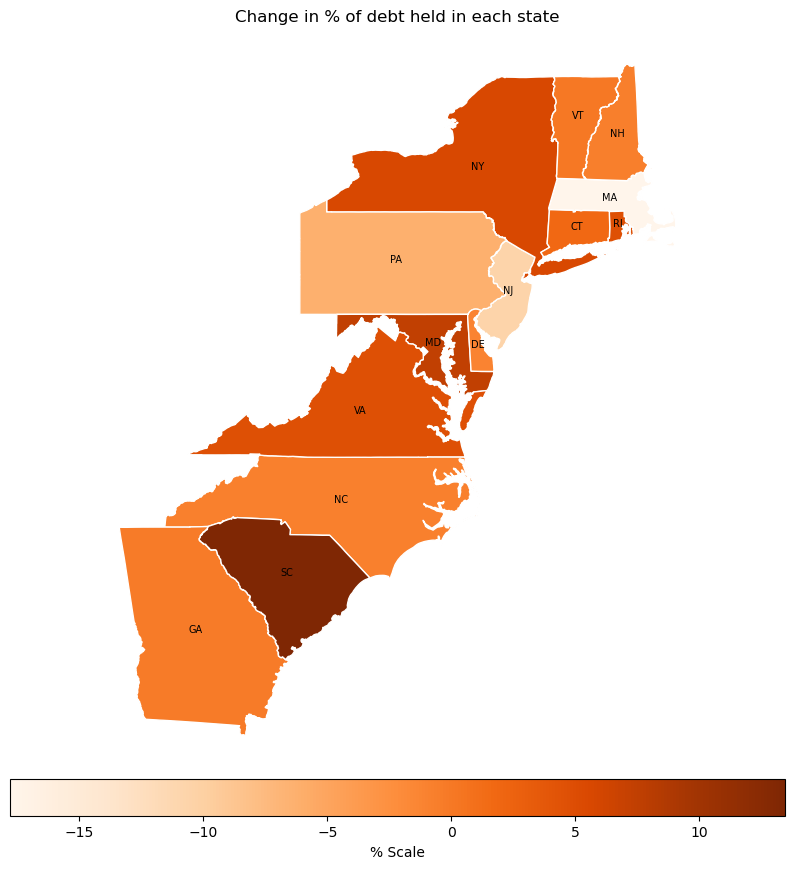

In [11]:
makeGraph('total asset pct dif', "Change in % of debt held in each state", "% Scale")

## Total Debt Breakdown (per Capita)

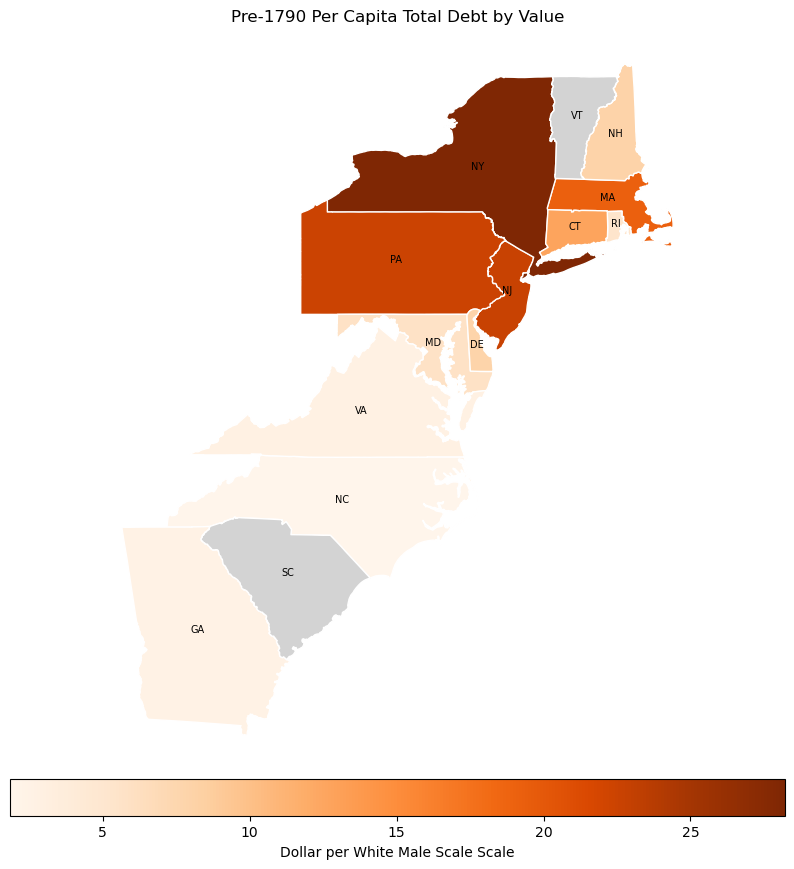

In [12]:
makeGraph('pre1790 total (pop adj)', "Pre-1790 Per Capita Total Debt by Value", "Dollar per White Male Scale Scale")

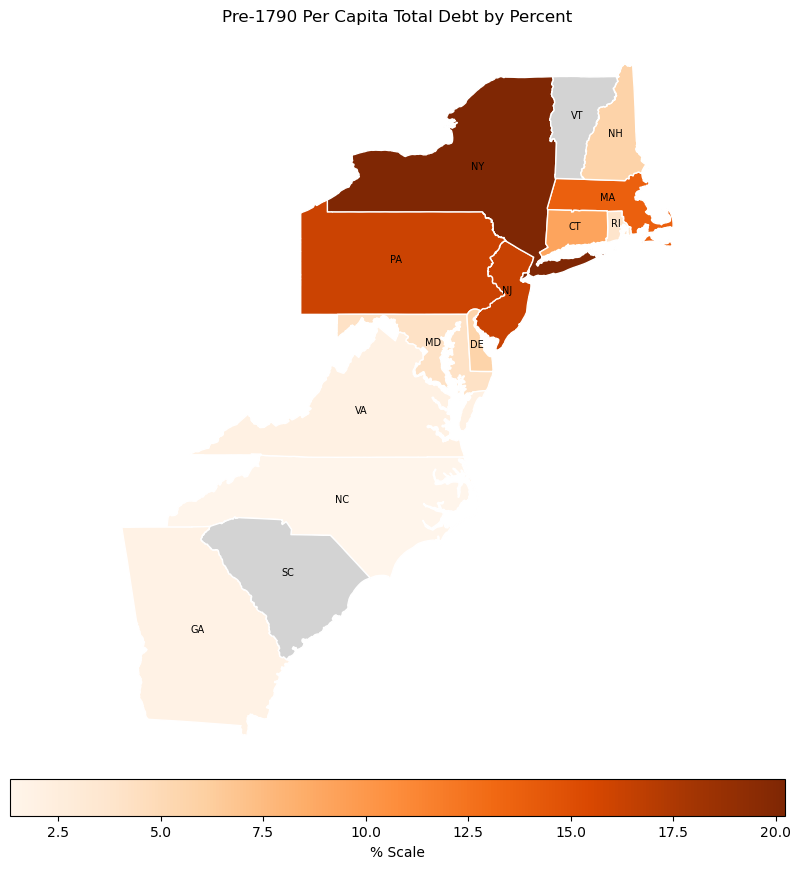

In [13]:
makeGraph('pre1790 pct (pop adj)', "Pre-1790 Per Capita Total Debt by Percent", "% Scale")

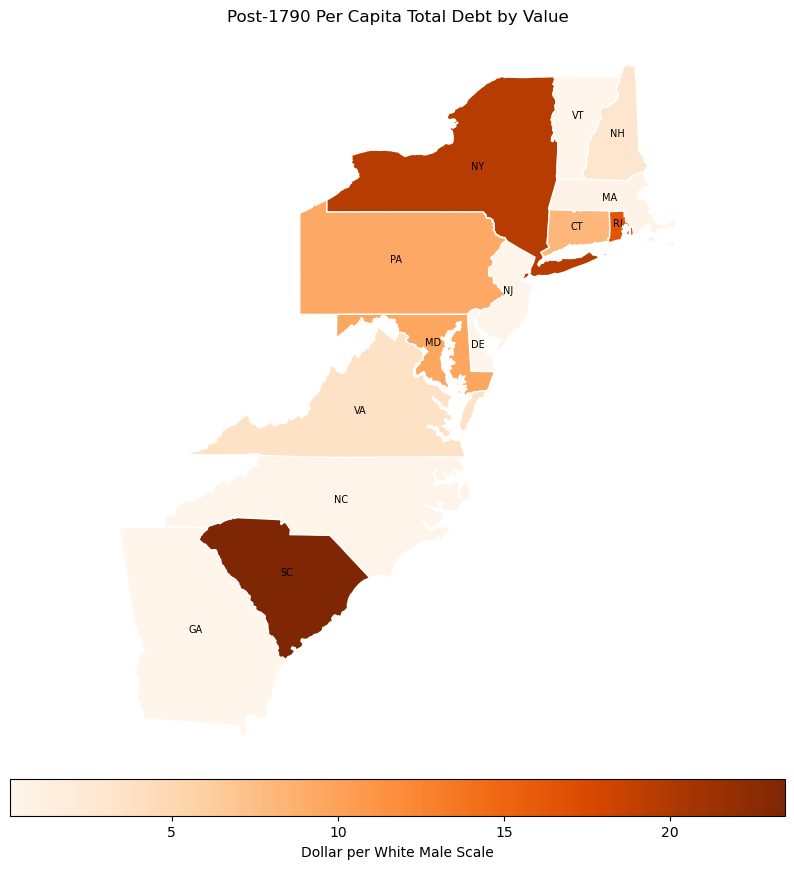

In [14]:
makeGraph('post1790 total (pop adj)', "Post-1790 Per Capita Total Debt by Value", "Dollar per White Male Scale")

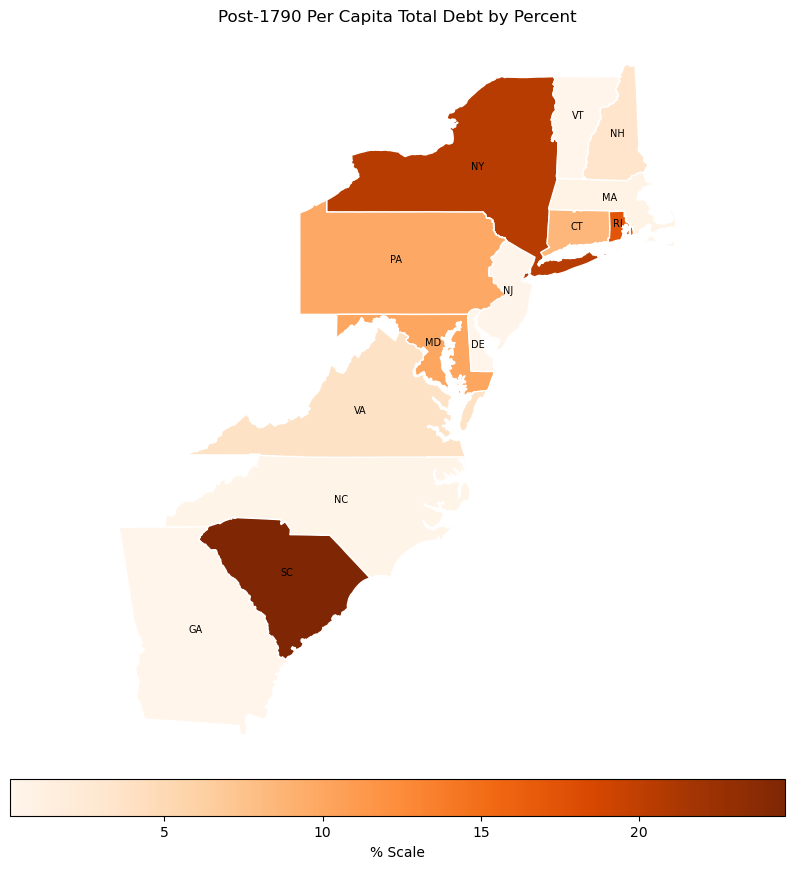

In [15]:
makeGraph('post1790 pct (pop adj)', "Post-1790 Per Capita Total Debt by Percent", "% Scale")

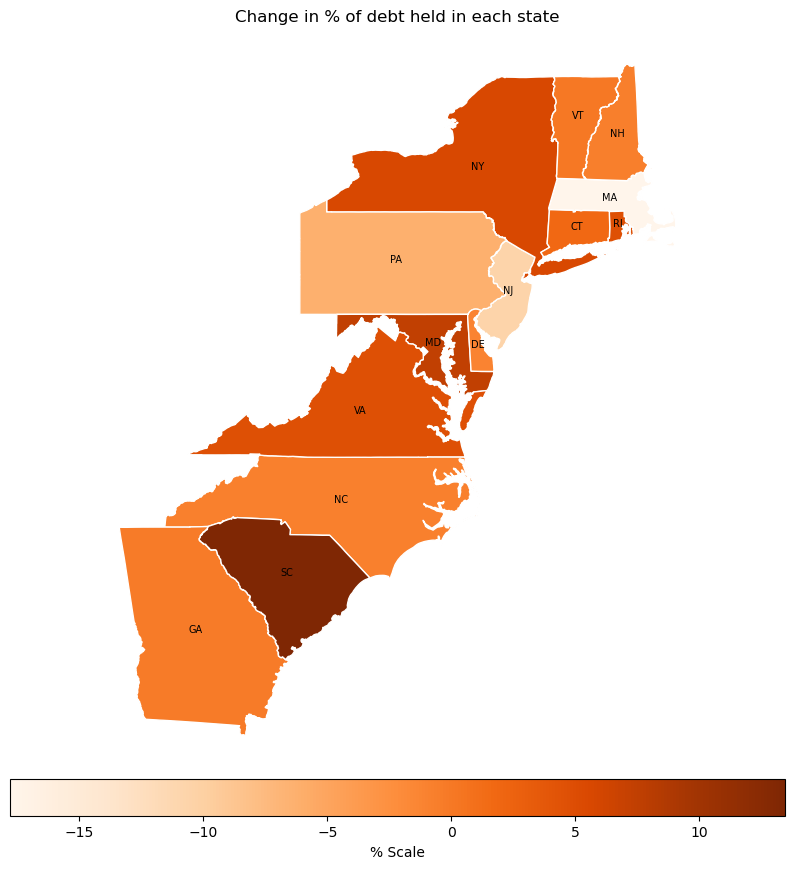

In [16]:
makeGraph('total asset pct dif', "Change in % of debt held in each state", "% Scale")

## Pre-1790 Individual Debt breakdown

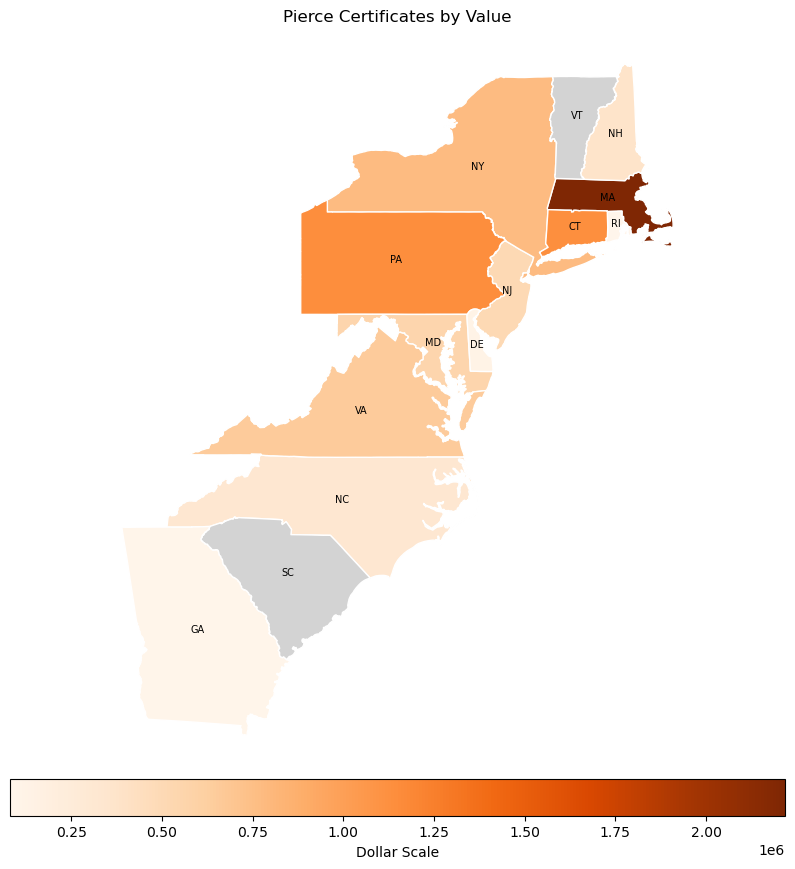

In [17]:
makeGraph("Pierce Certificates Value", "Pierce Certificates by Value", "Dollar Scale")

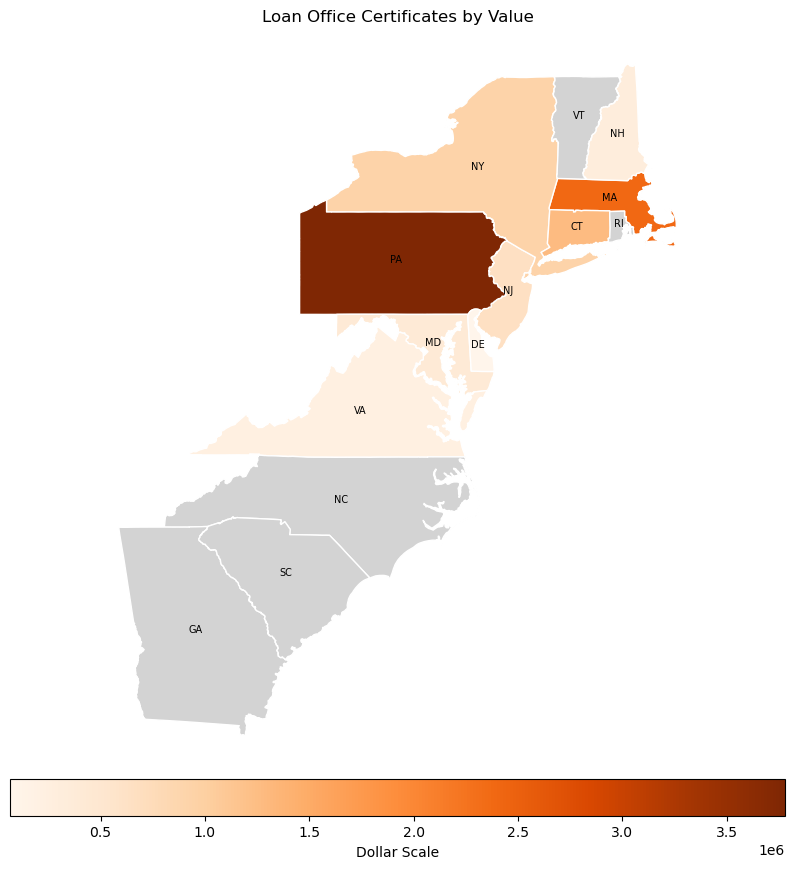

In [18]:
makeGraph("Loan Office Certificates Specie Value", "Loan Office Certificates by Value", "Dollar Scale")

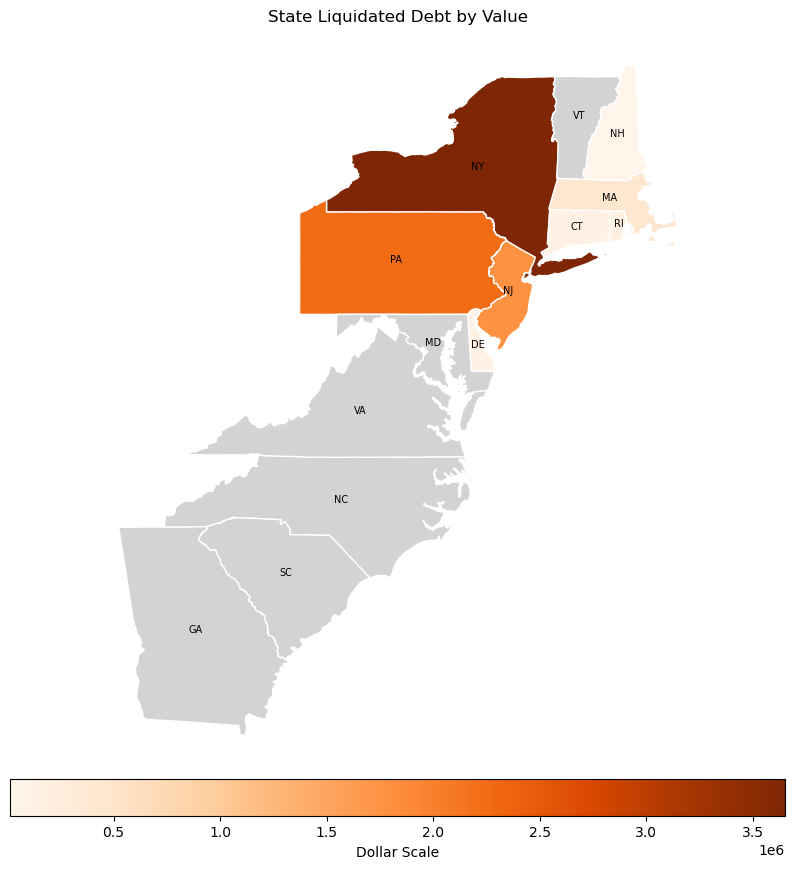

In [19]:
makeGraph("State Liquidated Debt Dollars", "State Liquidated Debt by Value", "Dollar Scale")

## Post-1790 Individual debt Breakdown

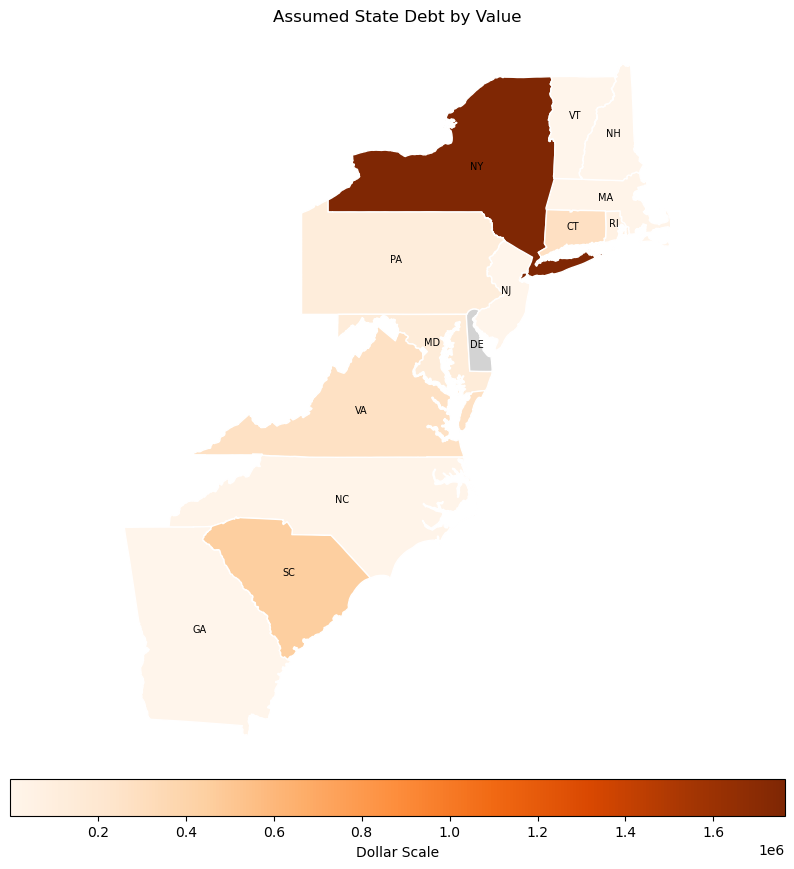

In [20]:
makeGraph("ASD Total", "Assumed State Debt by Value", "Dollar Scale")

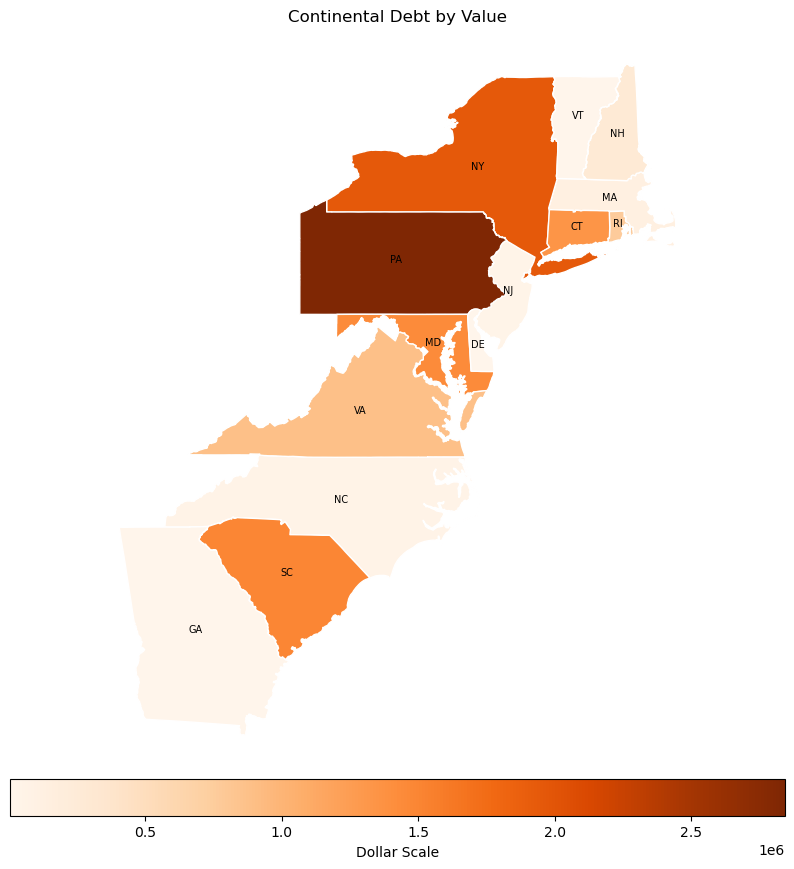

In [21]:
makeGraph("CD Total", "Continental Debt by Value", "Dollar Scale")